# Final Project

## **Project Title:**  Monopoly Game in Real Estate and Hospitality Industries Analysis

### 1. Team Members:
-    Yassin Khudari 
-    Samuel Soares Walton


### 2. Summary:
In this project, we planned to explore Orlando’s real estate and hospitality sectors through insights generated by auction theory, and agent-based model simulations. Also, visualize the results of our models using the Orlando map. Initially, the goal was to understand how those theories impact decision-making processes related to investment, mortgage interests,  risk assessment, surge pricing,  and resource allocation within the two industries to be analyzed.

However, during the implementation phase, we ran into several issues related to data availability. Many data source platforms that we initially identified did not offer a reasonable quantity of historical data in their open-source version that could support our analysis. Most of them had summaries or quarter reports, but the cost of a full year's worth of data was incompatible with our budget.

Considering the scenario above, we were forced to adjust the scope and the environment of our project.  Instead of analyzing the Orlando market, we switched to Manhattan, NY because of the higher availability of data related to its Airbnb market. We secured one year's worth of Airbnb listings with a rich mix of details, including pricing, amenities, location, and others.




### 3. Agent-Based Model:

Given the nature of our data, we decided to create an ABM model to simulate the dynamics involving Airbnb accommodations, tourists visiting the city, and hotel accommodations as well. The goal is to understand how tourists make decisions when choosing accommodations and estimate the prices of these services along with their occupancy rates during one year (December 2022 through November 2023). 

The Airbnb agent's base price is set based on the price in the dataset (real prices). The amenities are also derived from the amenities column in the data, along with the location. However, given the high number of locations available in the dataset, we decided to standardize these areas in large sections of Manhattan locations such as Upper, Mid, and Lower Manhattan. Also, to reduce the complexity of the model, we created categories for the Airbnbs based on their prices. Each listing was categorized into `Budget`, `Standard`, or `Premium`.

For the tourist data, we collected statistics of monthly visitors flying to the airports of John F. Kennedy and LaGuardia in New York. These numbers were used to understand how the seasonality related to the flow of visitors changes how Airbnb hosts and hotels alter their prices over the year.

Besides that, we collected data related to the hotel industry from the Pwc Manhattan Lodging Index. It is a quarterly report that shows the performance statistics for the lodging sector in the city. From this source, we used the average daily rate (“ADR”) of hotels in Manhattan, plus the monthly rate of hotels categorized by Luxury, Upper Upscale, Upscale, Upper Midscale, and Upper Manhattan, which we named Luxury Upper Manhattan.  The hotel base price is dynamically adjusted during the simulation. It is initially set to the average price from the PwC report for the specific type of hotel. A list of amenities offered by the hotel is defined in the hotel_amenities dictionary.  The location is assigned based on the hotel_types_to_manhattan mapping, correlating hotel types to specific areas in Manhattan.

3.1. Rules:
**Rule 1:** Hotel Agents: Each hotel agent is initialized with specific attributes like Type, price, amenities, location, hotel_type, and a predefined capacity.

*Airbnb Agents:* Each Airbnb agent is initialized similarly, with attributes including  `Type`, `base_price`,` amenities`, `location`,` airbnb_type`, and `capacity.`


**Rule 2:** Tourist Agent Initialization
Each tourist agent is assigned a random budget level and preferences for accommodation attributes like location and amenities. The capacity of each accommodation agent is fixed and does not change throughout the simulation.


**Rule 3:** Dynamic Pricing Adjustment
The pricing of each accommodation agent `(hotel and Airbnb) `is adjusted monthly based on visitor demand, calculated as a function of total visitors. The demand factor, influencing pricing adjustments, is directly proportional to the number of visitors.

**Rule 4:** Accommodation Selection by Tourists
Tourist agents select accommodations based on a utility score, which is a weighted sum of the price score, location score, and amenity score as follows:

-   *Price Score:* How well the accommodation fits within the tourist's budget.
-   *Location Score:* Whether the accommodation's location matches the tourist's location preference.
-   *Amenity Score:* The degree to which the accommodation’s amenities align with the tourist’s preferences.

**Rule 5**: Occupancy Rate Calculation
After all tourists make their accommodation choices, the occupancy rate for each accommodation agent is updated. The occupancy rate is calculated as the ratio of the number of tourists who chose the accommodation to the accommodation’s capacity, multiplied by 100.

**Rule 6:** Simulation Iteration
The simulation runs iteratively for each month, with tourists choosing accommodations, followed by the calculation of occupancy rates. At the end of each month, the occupancy rates are compiled for analysis, and then the occupancy count for each accommodation is reset to zero for the next iteration.

**Rule 7:** Compilation of Simulation Results
At the end of each month, the simulation results, including average pricing and occupancy rates for each type of accommodation, are compiled into a structured format. And then reset to simulate the following month’s statistics.

We tried to recreate as much realistic as possible the accommodation industry by having a  variety of amenities and locations that define diverse behaviors among tourist agents. The choices of tourists, influenced by price, amenities, and location, ultimately affect the occupancy rates and pricing strategies of the accommodations, leading to dynamic market conditions that evolve over time.

At the end, the simulation results are formatted and saved into a CSV file for further analysis.


4. Results:
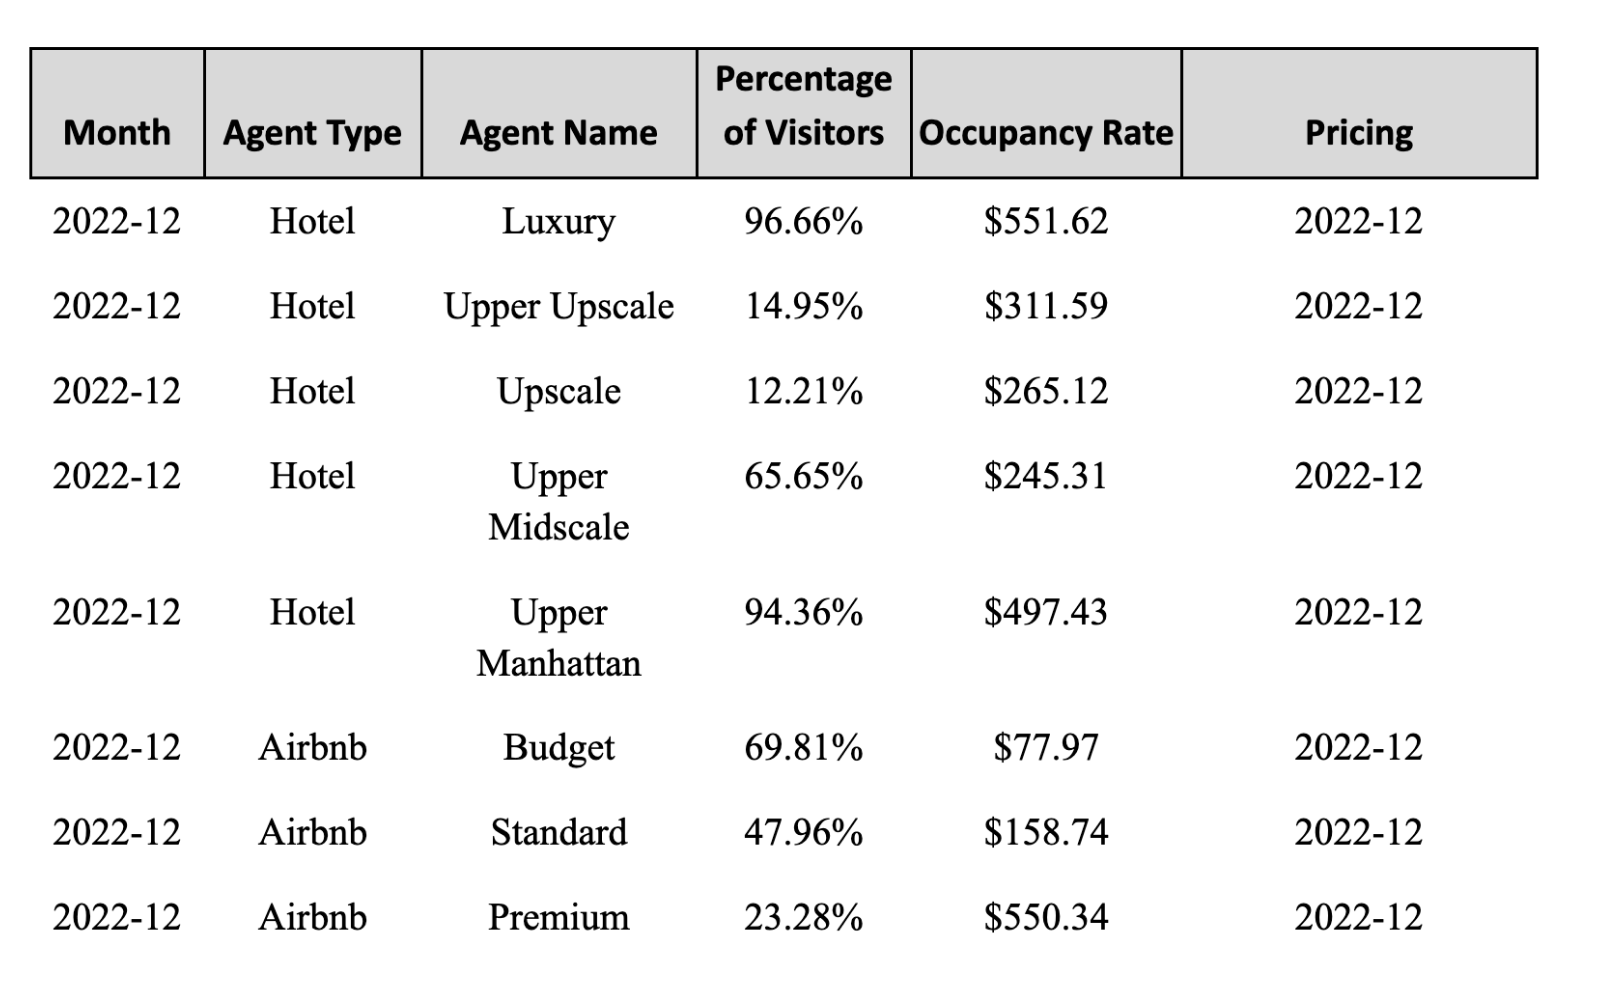

5. Visualizations

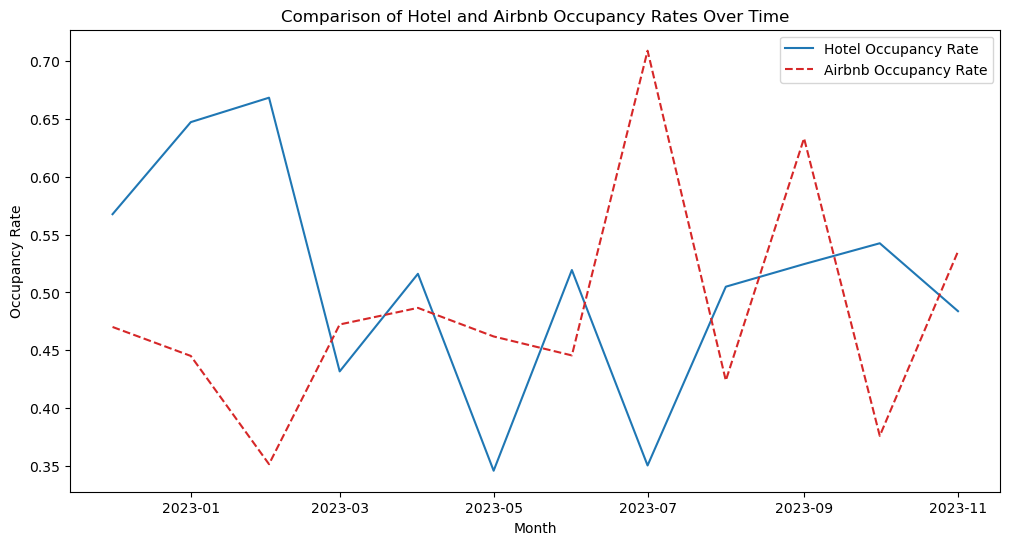

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

simulation_results_df = pd.read_csv('simulation_results.csv')

simulation_results_df['Occupancy Rate'] = simulation_results_df['Occupancy Rate'].str.rstrip('%').astype('float') / 100
simulation_results_df['Month'] = pd.to_datetime(simulation_results_df['Month'], format='%Y-%m')

hotel_data = simulation_results_df[simulation_results_df['Agent Type'] == 'Hotel']
airbnb_data = simulation_results_df[simulation_results_df['Agent Type'] == 'Airbnb']

monthly_occupancy = simulation_results_df.groupby(['Month', 'Agent Type'])['Occupancy Rate'].mean().reset_index()

monthly_occupancy_hotels = monthly_occupancy[monthly_occupancy['Agent Type'] == 'Hotel']
monthly_occupancy_airbnbs = monthly_occupancy[monthly_occupancy['Agent Type'] == 'Airbnb']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(monthly_occupancy_hotels['Month'], monthly_occupancy_hotels['Occupancy Rate'], label='Hotel Occupancy Rate', color='tab:blue')

ax1.plot(monthly_occupancy_airbnbs['Month'], monthly_occupancy_airbnbs['Occupancy Rate'], label='Airbnb Occupancy Rate', color='tab:red', linestyle='--')

ax1.set_xlabel('Month')
ax1.set_ylabel('Occupancy Rate')
ax1.set_title('Comparison of Hotel and Airbnb Occupancy Rates Over Time')
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

In this visualization, we can compare the both agents' hotels and AirBnb based on the  Average Occupancy Rate (AOR) and Average Price. As seen, hotels have a higher AOR and average price. On the other hand, AirBnnb has lower AOR and average price. Moreover, we can conclude that December, January, and July are the months of busiest schedule for Airbnbs, and Dec, along with Jan are the most busiest months for Hotels.